**1. 필요한 라이브러리 임포트**


*   panda: 데이터프레임을 생성하고 조작하는데 사용됩니다.
*   numpy: 배열, 행렬 및 이러한 배열에 대한 수학적 함수 모음을 효율적으로 다룰 수 있도록 지원합니다.
*   Tokenize, pad_sequences : 텍스트 데이터를 토큰화하고 시퀀스로 변환합니다.
*   Sequential,Embedding, GRU, Dense, Dropout : 모델을 생성하는데 사용됩니다.
*   train_test_split : train data, validation data, test data를 랜덤하게 일정한 비율로 나누는데 사용됩니다.

**2. 데이터 로드 및 확인**

한 개의 data_path = 'final_data_sentence.csv' csv 파일에서 데이터를 불러옵니다:

*   final_data_sentence.csv: 보이스피싱과 전자상거래 데이터를 문장 단위로 합친 데이터

**3. 텍스트 전처리**

voice_phishing_data['sentence']와 voice_phishing_data['label']을 리스트로 변환

토큰화 및 패딩 : 모델을 훈련시키기 앞서 전처리를 해줍니다.


**4. 데이터 스플릿**

train, valdation, test 세 개로 각자 0.6, 0.2, 0,2 의 비율로 랜덤하게 데이터를 나눕니다

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split



data_path = 'final_data_sentence.csv'


# 데이터 로드
voice_phishing_data = pd.read_csv(data_path)

# 텍스트 전처리
sentences = voice_phishing_data['sentence'].astype(str).tolist()
labels = voice_phishing_data['label'].tolist()  # 라벨 컬럼이 있는 경우

In [ ]:
print(voice_phishing_data)

                                                 sentence  label
0                                  네 감사합니다. 혹시 추가적인 문의사항.      0
1                                         네 네 뭐 그런게 좀 크죠.      0
2                                그리고 런처 그 전용탭 기능 삭제 이후에는.      0
3                       예 예 그냥 제가 인제 그 저희가 있는 거로 쓰고 있었어요.      0
4              15일날십 오 일날 수령을 하셨더라고요. 그럼 오늘 반송 처리 가능하실까요?      0
...                                                   ...    ...
292431                        아 그리고 중간 고객 브로커는 아주 조금 나쁘다.      1
292432     이후에 너 사실 일단 그 계좌 조회를 해서 뭐 그 보니 없다고 준비해 드릴 건데요.      1
292433                          그러면 저는 본인께서 주로 어떤 그러니까 하고      1
292434  왜냐하면 저희가 2015년 7월 9일 목요일에 불법도박 금융 사기단 일단 그런 거를...      1
292435                                  통장에 대해 41명을 했습니다.      1

[292436 rows x 2 columns]


In [ ]:
# 토큰화 및 패딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, padding='post')

In [ ]:
# 훈련 및 검증 데이터셋 분할 (스플릿을 바꿔서 데이터 리프레시)
x_train, temp_sequences, y_train, temp_labels = train_test_split(
    padded_sequences, labels, test_size=0.4, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(
    temp_sequences, temp_labels, test_size=0.5, random_state=42)

**5. GRU 모델 정의**:
임베딩층, GRU 128 히든 유닛, 보이스피싱인지 아닌지 이진분류 해주는 OUTPUT DENSE 등을 기본으로 모델을 정의합니다





**6. model train**

32 배치사이즈, 50 에폭으로 훈련시킵니다.

*   checkpoint_0 = ModelCheckpoint("best_model_0.h5", monitor='val_loss', verbose=1, save_best_only=True) : validation_loss가 가장 적은 에폭을 best_model로 저장합니다.

*   model.save('model_0.h5') : train이 끝나면  model을 저장합니다.





**7. 시각화에 필요한 라이브러리 임포트:**

import matplotlib.pyplot as plt : 그래프를 시각화합니다.




**8, train, validation accuracy, loss 시각화**
train accuracy와 validation accuracy
train loss와 validation loss 이 두개의 그래프를 시각화합니다



**9. 성능 평가:**
전처리 과정에서 0.2의 비율로 나눴던 test_data를 활용해 accuracy, loss, precision, recall, F1-score를 평가합니다.




**10. hyperparameter optimization**
모델의 accuracy, loss, precision, recall, F1-score를 활용해 batch_size, gru의 hidden units,gru-layer 층 수, Dense 층, drop-out 등을 비교해서 최적의 hyperparmeter를 찾습니다.

Batch Size:Batch size가 32가 아닌 model들은 잘 훈련이 되지 않거나 32의 모델보다 성능이 떨어졌습니다.

GRU hidden units : 128일 때 가장 성능이 좋은 모델이 나타났습니다.

GRU LAYER : 1,2,3 층을 구축해보았고 GRU 2층으로 구성했을 때 성능이 좋은 모델이 나타났습니다.

Dense_layer : output_dense 위에 DENSE_Layer층을 64의 노드로 구성했을 때 더 성능이 향상되었습니다.

drop_out : 50epoch의 학습을 진행하면서 과적합을 막기 위해 drop_out 0.5를 추가했지만 test_data에서의 성능이 떨어졌습니다.

In [ ]:
# GRU 모델 정의
vocab_size = len(word_index) + 1
embedding_dim = 128
max_length = padded_sequences.shape[1]

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GRU(128),
    Dense(1, activation='sigmoid')  # 이진 분류의 경우
])

# 모델 컴파일
model.compile(loss='binary_crossentropy',  # 이진 분류의 경우
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

# ModelCheckpoint 콜백을 설정하여 최상의 검증 손실이 나타날 때마다 모델을 저장합니다.


histroy = model.fit(x_train, np.array(y_train), epochs=50,
                    validation_data=(x_validation, np.array(y_validation)),
                    batch_size=32, verbose=1,callbacks = [checkpoint_0])

model.save('model_0.h5')

Epoch 1/50
5483/5484 [============================>.] - ETA: 0s - loss: 0.5632 - accuracy: 0.7502
Epoch 1: val_loss improved from inf to 0.56457, saving model to best_model_0.h5
5484/5484 [==============================] - 68s 12ms/step - loss: 0.5632 - accuracy: 0.7501 - val_loss: 0.5646 - val_accuracy: 0.7494
Epoch 2/50
5484/5484 [==============================] - ETA: 0s - loss: 0.5628 - accuracy: 0.7501
Epoch 2: val_loss improved from 0.56457 to 0.56307, saving model to best_model_0.h5
5484/5484 [==============================] - 65s 12ms/step - loss: 0.5628 - accuracy: 0.7501 - val_loss: 0.5631 - val_accuracy: 0.7494
Epoch 3/50
5481/5484 [============================>.] - ETA: 0s - loss: 0.5626 - accuracy: 0.7501
Epoch 3: val_loss did not improve from 0.56307
5484/5484 [==============================] - 68s 12ms/step - loss: 0.5626 - accuracy: 0.7501 - val_loss: 0.5632 - val_accuracy: 0.7494
Epoch 4/50
5483/5484 [============================>.] - ETA: 0s - loss: 0.5625 - accuracy:

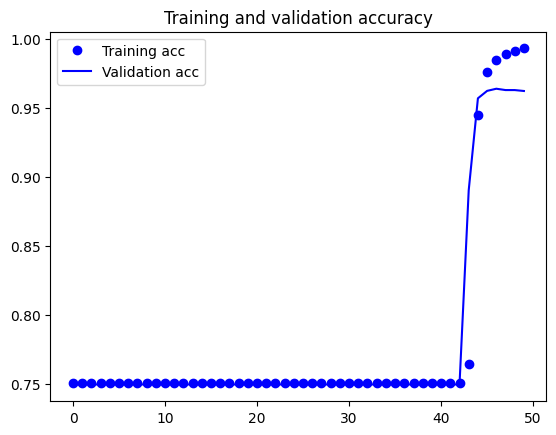

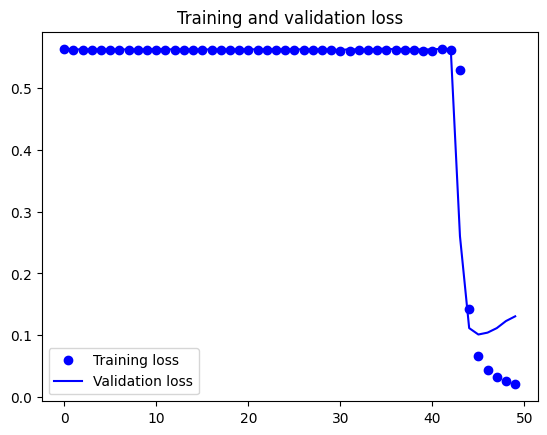

In [ ]:
import matplotlib.pyplot as plt

# 손실 및 정확도 저장
train_acc = histroy.history['accuracy']
val_acc = histroy.history['val_accuracy']
train_loss = histroy.history['loss']
val_loss = histroy.history['val_loss']

# 손실 곡선 저장
plt.figure()
plt.plot(len(1,epochs+1), histroy.history['loss'], label='Training Loss')
plt.plot(len(1,epochs+1), histroy.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.savefig('loss_curve.png')

# 정확도 곡선 저장
plt.figure()
plt.plot(len(1,epochs+1), histroy.history['accuracy'], label='Training Accuracy')
plt.plot(len(1,epochs+1), histroy.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.savefig('accuracy_curve.png')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 모델 평가
test_loss, test_accuracy = model.evaluate(np.array(x_test), np.array(y_test), verbose=2)

# 모델 예측
predictions = model.predict(np.array(x_test))
predictions = (predictions > 0.5)

# 정밀도, 재현율, F1 스코어 계산
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# 결과 출력
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

1828/1828 - 7s - loss: 0.1278 - accuracy: 0.9629 - 7s/epoch - 4ms/step
1828/1828 [==============================] - 7s 3ms/step
Test Accuracy: 0.9628983736038208
Test Loss: 0.12777157127857208
Precision: 0.9229828019849092
Recall: 0.9290455011973999
F1 Score: 0.9260042283298098


In [ ]:
# GRU 모델 정의
vocab_size = len(word_index) + 1
embedding_dim = 128
max_length = padded_sequences.shape[1]

model_base = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GRU(64),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # 이진 분류의 경우
])

# 모델 컴파일
model_base.compile(loss='binary_crossentropy',  # 이진 분류의 경우
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

# ModelCheckpoint 콜백을 설정하여 최상의 검증 손실이 나타날 때마다 모델을 저장합니다.
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

histroy_base = model_base.fit(x_train, np.array(y_train), epochs=50,
                    validation_data=(x_validation, np.array(y_validation)),
                    batch_size=32, verbose=1,callbacks = [checkpoint])

model_base.save('model_base.h5')

Epoch 1/50
5483/5484 [============================>.] - ETA: 0s - loss: 0.5634 - accuracy: 0.7501
Epoch 1: val_loss improved from inf to 0.56312, saving model to best_model.h5
5484/5484 [==============================] - 85s 15ms/step - loss: 0.5633 - accuracy: 0.7501 - val_loss: 0.5631 - val_accuracy: 0.7494
Epoch 2/50
5484/5484 [==============================] - ETA: 0s - loss: 0.5627 - accuracy: 0.7501
Epoch 2: val_loss improved from 0.56312 to 0.56301, saving model to best_model.h5
5484/5484 [==============================] - 89s 16ms/step - loss: 0.5627 - accuracy: 0.7501 - val_loss: 0.5630 - val_accuracy: 0.7494
Epoch 3/50
5480/5484 [============================>.] - ETA: 0s - loss: 0.5625 - accuracy: 0.7501
Epoch 3: val_loss improved from 0.56301 to 0.56296, saving model to best_model.h5
5484/5484 [==============================] - 93s 17ms/step - loss: 0.5625 - accuracy: 0.7501 - val_loss: 0.5630 - val_accuracy: 0.7494
Epoch 4/50
5484/5484 [==============================] - ETA

1828/1828 - 7s - loss: 0.1735 - accuracy: 0.9594 - 7s/epoch - 4ms/step
1828/1828 [==============================] - 5s 3ms/step
Test Loss: 0.17347605526447296, Test Accuracy: 0.9593933820724487, Test Precision: 0.916043507817811, Test Recall: 0.921997947314403, Test F1 Score: 0.9190110826939472
Final Training Loss: 0.010613172315061092
Final Validation Loss: 0.18408656120300293
Final test Loss: 0.17347605526447296
Final Test Accuracy: 0.9593933820724487
Final Test Precision: 0.916043507817811
Final Test Recall: 0.921997947314403
Final Test F1 Score: 0.9190110826939472


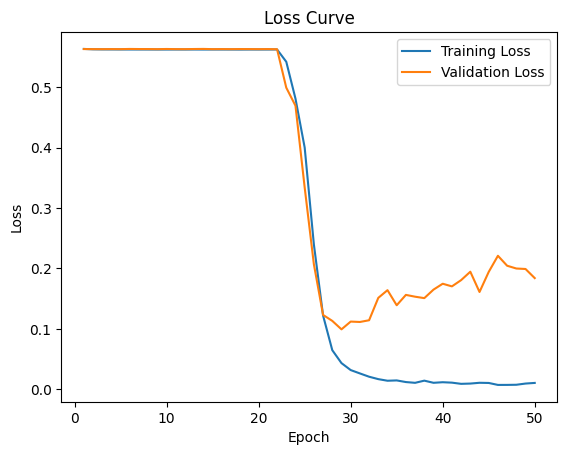

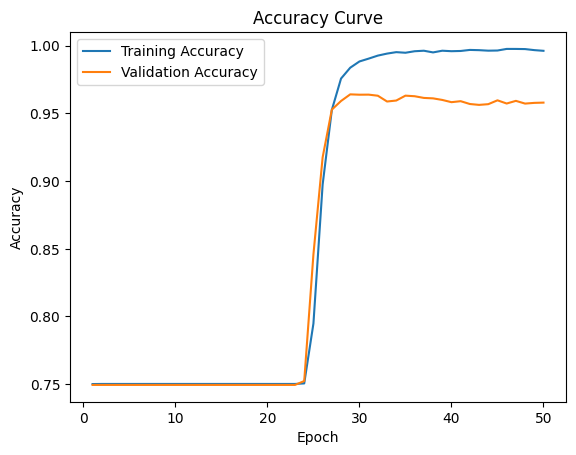

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 손실 및 정확도 저장
train_acc = histroy_base.history['accuracy']
val_acc = histroy_base.history['val_accuracy']
train_loss = histroy_base.history['loss']
val_loss = histroy_base.history['val_loss']

epochs = 50
length = epochs + 1

# 에폭 범위 생성
epoch_range = range(1, length)

# 손실 곡선 저장
plt.figure()
plt.plot(epoch_range, histroy_base.history['loss'], label='Training Loss')
plt.plot(epoch_range, histroy_base.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.savefig('loss_curve.png')

# 정확도 곡선 저장
plt.figure()
plt.plot(epoch_range, histroy_base.history['accuracy'], label='Training Accuracy')
plt.plot(epoch_range, histroy_base.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.savefig('accuracy_curve.png')

# 모델 평가
test_loss, test_accuracy = model_base.evaluate(np.array(x_test), np.array(y_test), verbose=2)

# 모델 예측
predictions = model_base.predict(np.array(x_test))
predictions = (predictions > 0.5)

# 정밀도, 재현율, F1 스코어 계산
test_precision = precision_score(y_test, predictions)
test_recall = recall_score(y_test, predictions)
test_f1 = f1_score(y_test, predictions)

print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Test Precision: {test_precision}, Test Recall: {test_recall}, Test F1 Score: {test_f1}')

# 최종 결과 출력
print(f'Final Training Loss: {train_loss[-1]}')
print(f'Final Validation Loss: {val_loss[-1]}')
print(f'Final test Loss: {test_loss}')
print(f'Final Test Accuracy: {test_accuracy}')
print(f'Final Test Precision: {test_precision}')
print(f'Final Test Recall: {test_recall}')
print(f'Final Test F1 Score: {test_f1}')

In [ ]:
# GRU 모델 정의
vocab_size = len(word_index) + 1
embedding_dim = 128
max_length = padded_sequences.shape[1]

model_base_1 = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GRU(64),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # 이진 분류의 경우
])

# 모델 컴파일
model_base_1.compile(loss='binary_crossentropy',  # 이진 분류의 경우
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

# ModelCheckpoint 콜백을 설정하여 최상의 검증 손실이 나타날 때마다 모델을 저장합니다.
checkpoint_1 = ModelCheckpoint("best_model_1.h5", monitor='val_loss', verbose=1, save_best_only=True)

histroy_base_1 = model_base_1.fit(x_train, np.array(y_train), epochs=50,
                    validation_data=(x_validation, np.array(y_validation)),
                    batch_size=64, verbose=1,callbacks = [checkpoint_1])

model_base_1.save('model_base_1.h5')

Epoch 1/50
2739/2742 [============================>.] - ETA: 0s - loss: 0.5631 - accuracy: 0.7501
Epoch 1: val_loss improved from inf to 0.56296, saving model to best_model_1.h5
2742/2742 [==============================] - 34s 12ms/step - loss: 0.5631 - accuracy: 0.7501 - val_loss: 0.5630 - val_accuracy: 0.7494
Epoch 2/50
2738/2742 [============================>.] - ETA: 0s - loss: 0.5627 - accuracy: 0.7501
Epoch 2: val_loss did not improve from 0.56296
2742/2742 [==============================] - 35s 13ms/step - loss: 0.5627 - accuracy: 0.7501 - val_loss: 0.5639 - val_accuracy: 0.7494
Epoch 3/50
2738/2742 [============================>.] - ETA: 0s - loss: 0.5625 - accuracy: 0.7502
Epoch 3: val_loss did not improve from 0.56296
2742/2742 [==============================] - 35s 13ms/step - loss: 0.5626 - accuracy: 0.7501 - val_loss: 0.5630 - val_accuracy: 0.7494
Epoch 4/50
2742/2742 [==============================] - ETA: 0s - loss: 0.5625 - accuracy: 0.7501
Epoch 4: val_loss did not imp

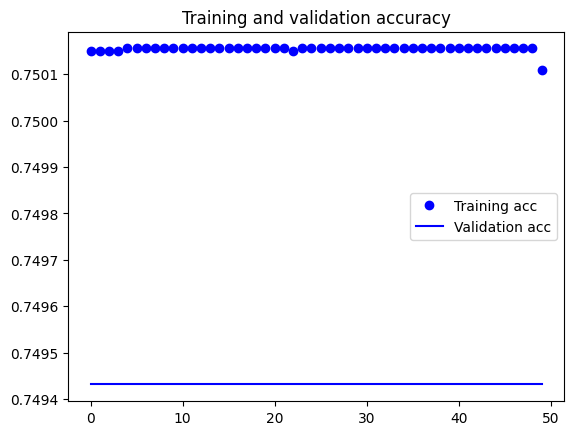

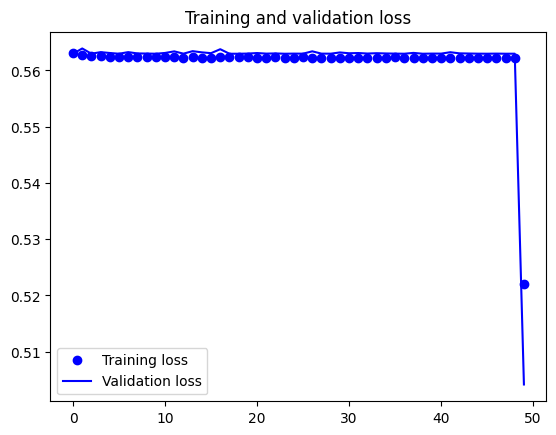

In [ ]:
import matplotlib.pyplot as plt

acc = histroy_base_1.history['accuracy']
val_acc = histroy_base_1.history['val_accuracy']
loss = histroy_base_1.history['loss']
val_loss = histroy_base_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 모델 평가
test_loss, test_accuracy = model_base_1.evaluate(np.array(x_test), np.array(y_test), verbose=2)

# 모델 예측
predictions = model_base_1.predict(np.array(x_test))
predictions = (predictions > 0.5)

# 정밀도, 재현율, F1 스코어 계산
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# 결과 출력
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

1828/1828 - 7s - loss: 0.5040 - accuracy: 0.7501 - 7s/epoch - 4ms/step
1828/1828 [==============================] - 6s 3ms/step
Test Accuracy: 0.750119686126709
Test Loss: 0.5039970874786377
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\pc\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# GRU 모델 정의
vocab_size = len(word_index) + 1
embedding_dim = 128
max_length = padded_sequences.shape[1]

model_base_128 = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GRU(128),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # 이진 분류의 경우
])

# 모델 컴파일
model_base_128.compile(loss='binary_crossentropy',  # 이진 분류의 경우
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

# ModelCheckpoint 콜백을 설정하여 최상의 검증 손실이 나타날 때마다 모델을 저장합니다.
checkpoint_128 = ModelCheckpoint("best_model_128.h5", monitor='val_loss', verbose=1, save_best_only=True)

histroy_base_128 = model_base_128.fit(x_train, np.array(y_train), epochs=50,
                    validation_data=(x_validation, np.array(y_validation)),
                    batch_size=32, verbose=1,callbacks = [checkpoint_128])

model_base_128.save('model_base_128.h5')

Epoch 1/50
5479/5484 [============================>.] - ETA: 0s - loss: 0.5634 - accuracy: 0.7500
Epoch 1: val_loss improved from inf to 0.56333, saving model to best_model_128.h5
5484/5484 [==============================] - 65s 12ms/step - loss: 0.5634 - accuracy: 0.7500 - val_loss: 0.5633 - val_accuracy: 0.7494
Epoch 2/50
5481/5484 [============================>.] - ETA: 0s - loss: 0.5626 - accuracy: 0.7501
Epoch 2: val_loss improved from 0.56333 to 0.56306, saving model to best_model_128.h5
5484/5484 [==============================] - 63s 11ms/step - loss: 0.5626 - accuracy: 0.7501 - val_loss: 0.5631 - val_accuracy: 0.7494
Epoch 3/50
5481/5484 [============================>.] - ETA: 0s - loss: 0.5625 - accuracy: 0.7502
Epoch 3: val_loss improved from 0.56306 to 0.56301, saving model to best_model_128.h5
5484/5484 [==============================] - 63s 11ms/step - loss: 0.5625 - accuracy: 0.7501 - val_loss: 0.5630 - val_accuracy: 0.7494
Epoch 4/50
5480/5484 [=========================

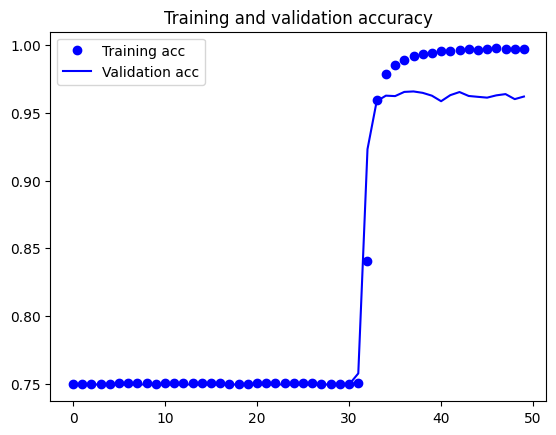

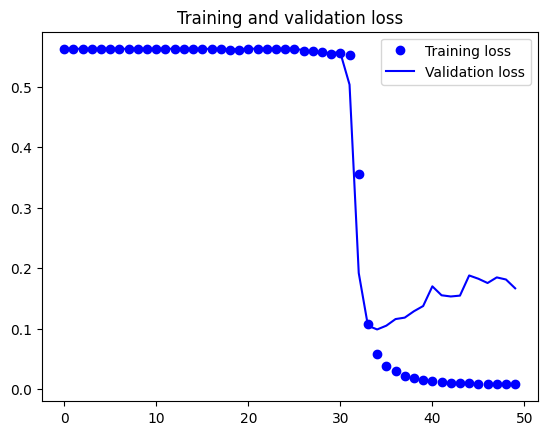

In [ ]:
import matplotlib.pyplot as plt

acc = histroy_base_128.history['accuracy']
val_acc = histroy_base_128.history['val_accuracy']
loss = histroy_base_128.history['loss']
val_loss = histroy_base_128.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 모델 평가
test_loss, test_accuracy = model_base_128.evaluate(np.array(x_test), np.array(y_test), verbose=2)

# 모델 예측
predictions = model_base_128.predict(np.array(x_test))
predictions = (predictions > 0.5)

# 정밀도, 재현율, F1 스코어 계산
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# 결과 출력
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

1828/1828 - 7s - loss: 0.1673 - accuracy: 0.9622 - 7s/epoch - 4ms/step
1828/1828 [==============================] - 8s 4ms/step
Test Accuracy: 0.962214469909668
Test Loss: 0.16731466352939606
Precision: 0.9091088978299584
Recall: 0.9430721861101607
F1 Score: 0.9257791509940893


In [ ]:
# GRU 모델 정의
vocab_size = len(word_index) + 1
embedding_dim = 128
max_length = padded_sequences.shape[1]

model_base_128_1 = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GRU(128),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # 이진 분류의 경우
])

# 모델 컴파일
model_base_128_1.compile(loss='binary_crossentropy',  # 이진 분류의 경우
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

# ModelCheckpoint 콜백을 설정하여 최상의 검증 손실이 나타날 때마다 모델을 저장합니다.
checkpoint_128_1 = ModelCheckpoint("best_model_128_1.h5", monitor='val_loss', verbose=1, save_best_only=True)

histroy_base_128_1 = model_base_128_1.fit(x_train, np.array(y_train), epochs=50,
                    validation_data=(x_validation, np.array(y_validation)),
                    batch_size=16, verbose=1,callbacks = [checkpoint_128_1])

model_base_128_1.save('model_base_128_1.h5')

Epoch 1/50
10966/10967 [============================>.] - ETA: 0s - loss: 0.5634 - accuracy: 0.7501
Epoch 1: val_loss improved from inf to 0.56321, saving model to best_model_128_1.h5
10967/10967 [==============================] - 127s 11ms/step - loss: 0.5634 - accuracy: 0.7501 - val_loss: 0.5632 - val_accuracy: 0.7494
Epoch 2/50
10966/10967 [============================>.] - ETA: 0s - loss: 0.5627 - accuracy: 0.7501
Epoch 2: val_loss improved from 0.56321 to 0.56297, saving model to best_model_128_1.h5
10967/10967 [==============================] - 125s 11ms/step - loss: 0.5627 - accuracy: 0.7501 - val_loss: 0.5630 - val_accuracy: 0.7494
Epoch 3/50
10963/10967 [============================>.] - ETA: 0s - loss: 0.5626 - accuracy: 0.7501
Epoch 3: val_loss did not improve from 0.56297
10967/10967 [==============================] - 122s 11ms/step - loss: 0.5626 - accuracy: 0.7501 - val_loss: 0.5631 - val_accuracy: 0.7494
Epoch 4/50
10961/10967 [============================>.] - ETA: 0s -

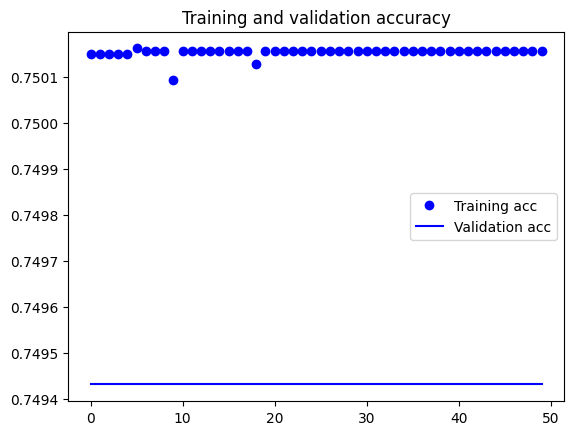

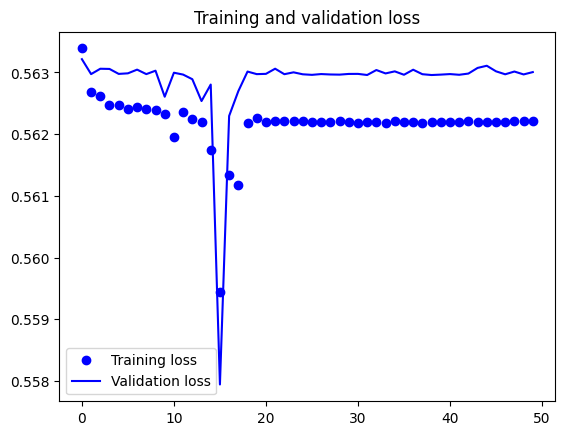

In [ ]:
import matplotlib.pyplot as plt

acc = histroy_base_128_1.history['accuracy']
val_acc = histroy_base_128_1.history['val_accuracy']
loss = histroy_base_128_1.history['loss']
val_loss = histroy_base_128_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 모델 평가
test_loss, test_accuracy = model_base_128_1.evaluate(np.array(x_test), np.array(y_test), verbose=2)

# 모델 예측
predictions = model_base_128_1.predict(np.array(x_test))
predictions = (predictions > 0.5)

# 정밀도, 재현율, F1 스코어 계산
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# 결과 출력
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

1828/1828 - 7s - loss: 0.5622 - accuracy: 0.7501 - 7s/epoch - 4ms/step
1828/1828 [==============================] - 6s 3ms/step
Test Accuracy: 0.750119686126709
Test Loss: 0.5622308254241943
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\pc\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# GRU 모델 정의
vocab_size = len(word_index) + 1
embedding_dim = 128
max_length = padded_sequences.shape[1]

model_2layer = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GRU(128, return_sequences=True),
    GRU(128),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # 이진 분류의 경우
])

# 모델 컴파일
model_2layer.compile(loss='binary_crossentropy',  # 이진 분류의 경우
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

# ModelCheckpoint 콜백을 설정하여 최상의 검증 손실이 나타날 때마다 모델을 저장합니다.
checkpoint_2layer = ModelCheckpoint("best_model_2layer.h5", monitor='val_loss', verbose=1, save_best_only=True)

histroy_base_2layer = model_2layer.fit(x_train, np.array(y_train), epochs=50,
                    validation_data=(x_validation, np.array(y_validation)),
                    batch_size=32, verbose=1,callbacks = [checkpoint_2layer])

model_2layer.save('model_base_2layer.h5')

Epoch 1/50
5483/5484 [============================>.] - ETA: 0s - loss: 0.5636 - accuracy: 0.7500
Epoch 1: val_loss did not improve from 0.09857
5484/5484 [==============================] - 102s 18ms/step - loss: 0.5636 - accuracy: 0.7500 - val_loss: 0.5638 - val_accuracy: 0.7494
Epoch 2/50
5481/5484 [============================>.] - ETA: 0s - loss: 0.5626 - accuracy: 0.7502
Epoch 2: val_loss did not improve from 0.09857
5484/5484 [==============================] - 102s 19ms/step - loss: 0.5626 - accuracy: 0.7501 - val_loss: 0.5634 - val_accuracy: 0.7494
Epoch 3/50
5481/5484 [============================>.] - ETA: 0s - loss: 0.5625 - accuracy: 0.7502
Epoch 3: val_loss did not improve from 0.09857
5484/5484 [==============================] - 101s 18ms/step - loss: 0.5625 - accuracy: 0.7501 - val_loss: 0.5632 - val_accuracy: 0.7494
Epoch 4/50
5484/5484 [==============================] - ETA: 0s - loss: 0.5625 - accuracy: 0.7501
Epoch 4: val_loss did not improve from 0.09857
5484/5484 [=

1828/1828 - 13s - loss: 0.2092 - accuracy: 0.9640 - 13s/epoch - 7ms/step
1828/1828 [==============================] - 12s 7ms/step
Test Loss: 0.2091752141714096, Test Accuracy: 0.964009702205658, Test Precision: 0.9113507825858214, Test Recall: 0.9482039001026343, Test F1 Score: 0.9294121592166594
Final Training Loss: 0.0055
Final Validation Loss: 0.2195
Final test Loss: 0.2091752141714096
Final Test Accuracy: 0.964009702205658
Final Test Precision: 0.9113507825858214
Final Test Recall: 0.9482039001026343
Final Test F1 Score: 0.9294121592166594


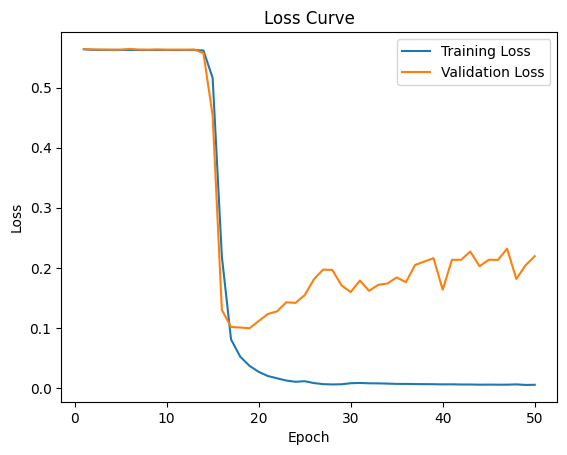

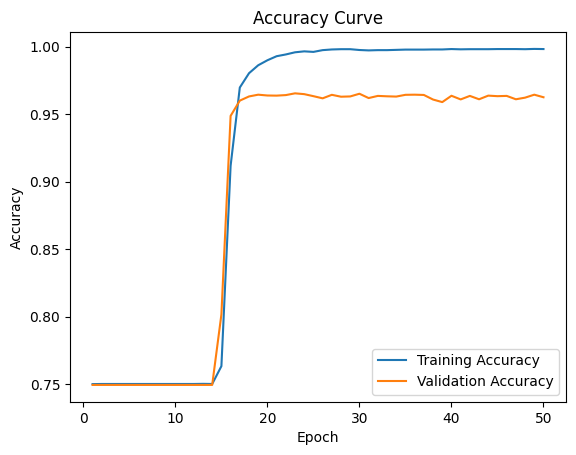

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 손실 및 정확도 저장
train_acc = histroy_base_2layer.history['accuracy']
val_acc = histroy_base_2layer.history['val_accuracy']
train_loss = histroy_base_2layer.history['loss']
val_loss = histroy_base_2layer.history['val_loss']

epochs = 50
length = epochs + 1

# 에폭 범위 생성
epoch_range = range(1, length)

# 손실 곡선 저장
plt.figure()
plt.plot(epoch_range, histroy_base_2layer.history['loss'], label='Training Loss')
plt.plot(epoch_range, histroy_base_2layer.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.savefig('loss_curve.png')

# 정확도 곡선 저장
plt.figure()
plt.plot(epoch_range, histroy_base_2layer.history['accuracy'], label='Training Accuracy')
plt.plot(epoch_range, histroy_base_2layer.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.savefig('accuracy_curve.png')

# 모델 평가
test_loss, test_accuracy = model_2layer.evaluate(np.array(x_test), np.array(y_test), verbose=2)

# 모델 예측
predictions = model_2layer.predict(np.array(x_test))
predictions = (predictions > 0.5)

# 정밀도, 재현율, F1 스코어 계산
test_precision = precision_score(y_test, predictions)
test_recall = recall_score(y_test, predictions)
test_f1 = f1_score(y_test, predictions)

print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Test Precision: {test_precision}, Test Recall: {test_recall}, Test F1 Score: {test_f1}')

# 최종 결과 출력
print(f'Final Training Loss: {train_loss[-1]}')
print(f'Final Validation Loss: {val_loss[-1]}')
print(f'Final test Loss: {test_loss}')
print(f'Final Test Accuracy: {test_accuracy}')
print(f'Final Test Precision: {test_precision}')
print(f'Final Test Recall: {test_recall}')
print(f'Final Test F1 Score: {test_f1}')
##### 가장높은 정확도와, F! Score로 hyper paramete ####

In [ ]:
from keras.layers import Dropout

# GRU 모델 정의
vocab_size = len(word_index) + 1
embedding_dim = 128
max_length = padded_sequences.shape[1]

model_drop = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GRU(128, return_sequences=True),
    Dropout(0.5),
    GRU(128),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # 이진 분류의 경우
])

# 모델 컴파일
model_drop.compile(loss='binary_crossentropy',  # 이진 분류의 경우
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

# ModelCheckpoint 콜백을 설정하여 최상의 검증 손실이 나타날 때마다 모델을 저장합니다.
checkpoint_drop = ModelCheckpoint("best_model_drop.h5", monitor='val_loss', verbose=1, save_best_only=True)

histroy_drop = model_drop.fit(x_train, np.array(y_train), epochs=50,
                    validation_data=(x_validation, np.array(y_validation)),
                    batch_size=32, verbose=1,callbacks = [checkpoint_drop])

model_drop.save('model_base_drop.h5')

Epoch 1/50
5483/5484 [============================>.] - ETA: 0s - loss: 0.5642 - accuracy: 0.7501
Epoch 1: val_loss improved from inf to 0.56303, saving model to best_model_drop.h5
5484/5484 [==============================] - 113s 20ms/step - loss: 0.5642 - accuracy: 0.7501 - val_loss: 0.5630 - val_accuracy: 0.7494
Epoch 2/50
5481/5484 [============================>.] - ETA: 0s - loss: 0.5627 - accuracy: 0.7502
Epoch 2: val_loss improved from 0.56303 to 0.56296, saving model to best_model_drop.h5
5484/5484 [==============================] - 111s 20ms/step - loss: 0.5627 - accuracy: 0.7501 - val_loss: 0.5630 - val_accuracy: 0.7494
Epoch 3/50
5481/5484 [============================>.] - ETA: 0s - loss: 0.5627 - accuracy: 0.7501
Epoch 3: val_loss did not improve from 0.56296
5484/5484 [==============================] - 111s 20ms/step - loss: 0.5627 - accuracy: 0.7501 - val_loss: 0.5632 - val_accuracy: 0.7494
Epoch 4/50
5482/5484 [============================>.] - ETA: 0s - loss: 0.5626 - 

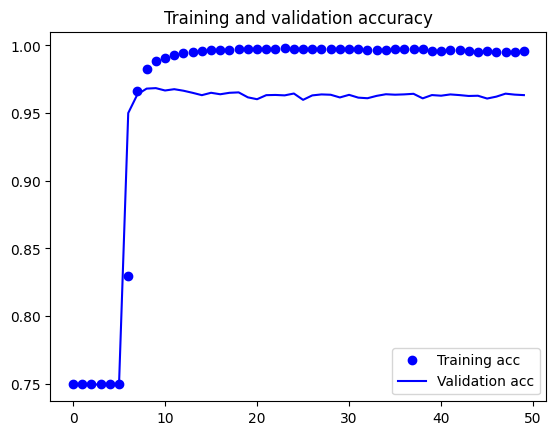

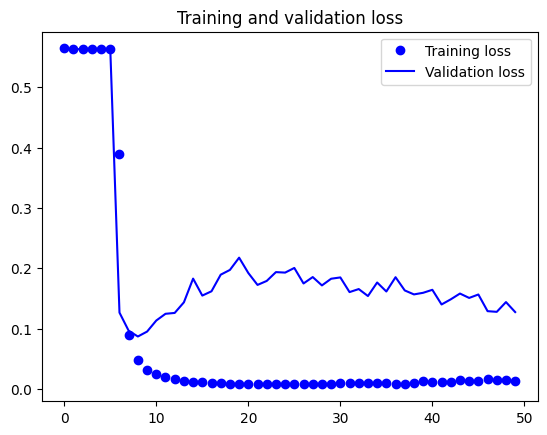

In [ ]:
import matplotlib.pyplot as plt

acc = histroy_drop.history['accuracy']
val_acc = histroy_drop.history['val_accuracy']
loss = histroy_drop.history['loss']
val_loss = histroy_drop.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 모델 평가
test_loss, test_accuracy = model_drop.evaluate(np.array(x_test), np.array(y_test), verbose=2)

# 모델 예측
predictions = model_drop.predict(np.array(x_test))
predictions = (predictions > 0.5)

# 정밀도, 재현율, F1 스코어 계산
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# 결과 출력
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

1828/1828 - 10s - loss: 0.1282 - accuracy: 0.9629 - 10s/epoch - 6ms/step
1828/1828 [==============================] - 10s 5ms/step
Test Accuracy: 0.9629154801368713
Test Loss: 0.12815959751605988
Precision: 0.9396636993076162
Recall: 0.9100239479986315
F1 Score: 0.9246063471097362


In [ ]:
from keras.layers import Dropout

# GRU 모델 정의
vocab_size = len(word_index) + 1
embedding_dim = 128
max_length = padded_sequences.shape[1]

model_drop_0 = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GRU(128, return_sequences=True),
    Dropout(0.5),
    GRU(128),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # 이진 분류의 경우
])

# 모델 컴파일
model_drop_0.compile(loss='binary_crossentropy',  # 이진 분류의 경우
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

# ModelCheckpoint 콜백을 설정하여 최상의 검증 손실이 나타날 때마다 모델을 저장합니다.
checkpoint_drop_0 = ModelCheckpoint("best_model_drop_0.h5", monitor='val_loss', verbose=1, save_best_only=True)

histroy_drop_0 = model_drop_0.fit(x_train, np.array(y_train), epochs=50,
                    validation_data=(x_validation, np.array(y_validation)),
                    batch_size=32, verbose=1,callbacks = [checkpoint_drop_0])

model_drop_0.save('model_base_drop_0.h5')

Epoch 1/50
5483/5484 [============================>.] - ETA: 0s - loss: 0.5651 - accuracy: 0.7502
Epoch 1: val_loss improved from inf to 0.56316, saving model to best_model_drop_0.h5
5484/5484 [==============================] - 123s 22ms/step - loss: 0.5651 - accuracy: 0.7502 - val_loss: 0.5632 - val_accuracy: 0.7494
Epoch 2/50
5483/5484 [============================>.] - ETA: 0s - loss: 0.5636 - accuracy: 0.7502
Epoch 2: val_loss did not improve from 0.56316
5484/5484 [==============================] - 130s 24ms/step - loss: 0.5636 - accuracy: 0.7501 - val_loss: 0.5651 - val_accuracy: 0.7494
Epoch 3/50
5482/5484 [============================>.] - ETA: 0s - loss: 0.4344 - accuracy: 0.8084
Epoch 3: val_loss improved from 0.56316 to 0.15179, saving model to best_model_drop_0.h5
5484/5484 [==============================] - 125s 23ms/step - loss: 0.4343 - accuracy: 0.8084 - val_loss: 0.1518 - val_accuracy: 0.9393
Epoch 4/50
5483/5484 [============================>.] - ETA: 0s - loss: 0.111

1828/1828 - 10s - loss: 0.1337 - accuracy: 0.9625 - 10s/epoch - 5ms/step
1828/1828 [==============================] - 10s 5ms/step
Test Loss: 0.1336621791124344, Test Accuracy: 0.9625393152236938, Test Precision: 0.9316886726893676, Test Recall: 0.9173451932945604, Test F1 Score: 0.9244612997759007
Final Training Loss: 0.008689180947840214
Final Validation Loss: 0.13841763138771057
Final test Loss: 0.1336621791124344
Final Test Accuracy: 0.9625393152236938
Final Test Precision: 0.9316886726893676
Final Test Recall: 0.9173451932945604
Final Test F1 Score: 0.9244612997759007


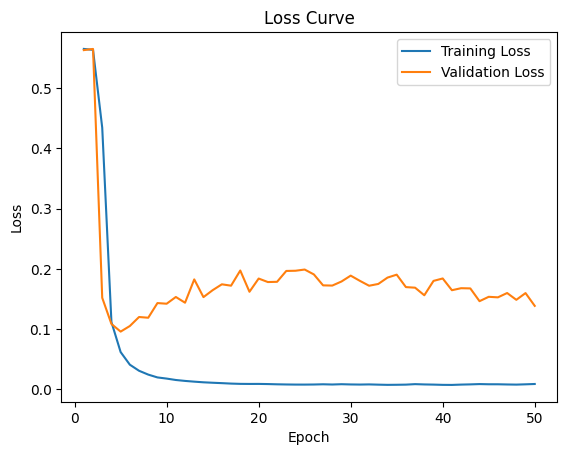

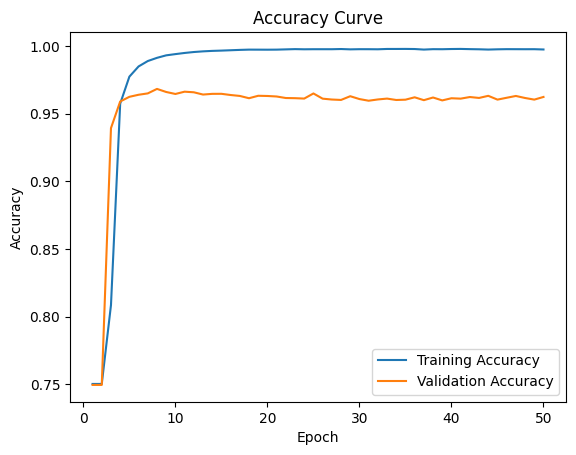

In [ ]:
import matplotlib.pyplot as plt

# 손실 및 정확도 저장
train_acc = histroy_drop_0.history['accuracy']
val_acc = histroy_drop_0.history['val_accuracy']
train_loss = histroy_drop_0.history['loss']
val_loss = histroy_drop_0.history['val_loss']

epochs = 50
length = epochs + 1

# 에폭 범위 생성
epoch_range = range(1, length)

# 손실 곡선 저장
plt.figure()
plt.plot(epoch_range, histroy_drop_0.history['loss'], label='Training Loss')
plt.plot(epoch_range, histroy_drop_0.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.savefig('loss_curve.png')

# 정확도 곡선 저장
plt.figure()
plt.plot(epoch_range, histroy_drop_0.history['accuracy'], label='Training Accuracy')
plt.plot(epoch_range, histroy_drop_0.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.savefig('accuracy_curve.png')

# 모델 평가
test_loss, test_accuracy = model_drop_0.evaluate(np.array(x_test), np.array(y_test), verbose=2)

# 모델 예측
predictions = model_drop_0.predict(np.array(x_test))
predictions = (predictions > 0.5)

# 정밀도, 재현율, F1 스코어 계산
test_precision = precision_score(y_test, predictions)
test_recall = recall_score(y_test, predictions)
test_f1 = f1_score(y_test, predictions)

print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Test Precision: {test_precision}, Test Recall: {test_recall}, Test F1 Score: {test_f1}')

# 최종 결과 출력
print(f'Final Training Loss: {train_loss[-1]}')
print(f'Final Validation Loss: {val_loss[-1]}')
print(f'Final test Loss: {test_loss}')
print(f'Final Test Accuracy: {test_accuracy}')
print(f'Final Test Precision: {test_precision}')
print(f'Final Test Recall: {test_recall}')
print(f'Final Test F1 Score: {test_f1}')

In [ ]:
from keras.layers import Dropout

# GRU 모델 정의
vocab_size = len(word_index) + 1
embedding_dim = 128
max_length = padded_sequences.shape[1]

model_3layer = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GRU(128, return_sequences=True),
    GRU(128, return_sequences=True),
    GRU(128),
    Dense(1, activation='sigmoid')  # 이진 분류의 경우
])

# 모델 컴파일
model_3layer.compile(loss='binary_crossentropy',  # 이진 분류의 경우
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

# ModelCheckpoint 콜백을 설정하여 최상의 검증 손실이 나타날 때마다 모델을 저장합니다.
checkpoint_3layer = ModelCheckpoint("best_model_3layer.h5", monitor='val_loss', verbose=1, save_best_only=True)

histroy_3layer = model_3layer.fit(x_train, np.array(y_train), epochs=50,
                    validation_data=(x_validation, np.array(y_validation)),
                    batch_size=32, verbose=1,callbacks = [checkpoint_3layer])

model_3layer.save('model_base_3layer.h5')

Epoch 1/50
5484/5484 [==============================] - ETA: 0s - loss: 0.5634 - accuracy: 0.7501
Epoch 1: val_loss improved from inf to 0.56400, saving model to best_model_3layer.h5
5484/5484 [==============================] - 169s 30ms/step - loss: 0.5634 - accuracy: 0.7501 - val_loss: 0.5640 - val_accuracy: 0.7494
Epoch 2/50
5483/5484 [============================>.] - ETA: 0s - loss: 0.5626 - accuracy: 0.7501
Epoch 2: val_loss improved from 0.56400 to 0.56373, saving model to best_model_3layer.h5
5484/5484 [==============================] - 168s 31ms/step - loss: 0.5626 - accuracy: 0.7501 - val_loss: 0.5637 - val_accuracy: 0.7494
Epoch 3/50
5484/5484 [==============================] - ETA: 0s - loss: 0.5625 - accuracy: 0.7501
Epoch 3: val_loss did not improve from 0.56373
5484/5484 [==============================] - 167s 30ms/step - loss: 0.5625 - accuracy: 0.7501 - val_loss: 0.5650 - val_accuracy: 0.7494
Epoch 4/50
5484/5484 [==============================] - ETA: 0s - loss: 0.562

1828/1828 - 17s - loss: 0.2518 - accuracy: 0.9616 - 17s/epoch - 9ms/step
1828/1828 [==============================] - 16s 9ms/step
Test Loss: 0.25180482864379883, Test Accuracy: 0.9615647792816162, Test Precision: 0.9106182349425592, Test Recall: 0.9382825863838522, Test F1 Score: 0.9242434454404529
Final Training Loss: 0.0051643033511936665
Final Validation Loss: 0.2596067786216736
Final test Loss: 0.25180482864379883
Final Test Accuracy: 0.9615647792816162
Final Test Precision: 0.9106182349425592
Final Test Recall: 0.9382825863838522
Final Test F1 Score: 0.9242434454404529


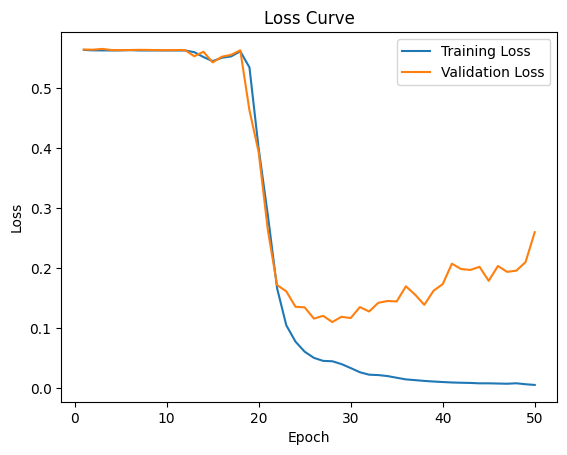

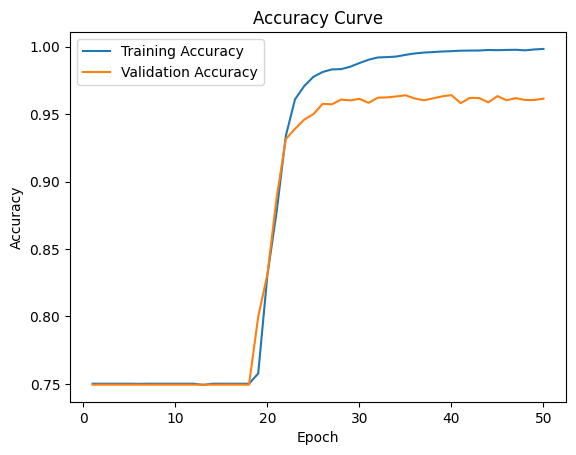

In [ ]:
import matplotlib.pyplot as plt

# 손실 및 정확도 저장
train_acc = histroy_3layer.history['accuracy']
val_acc = histroy_3layer.history['val_accuracy']
train_loss = histroy_3layer.history['loss']
val_loss = histroy_3layer.history['val_loss']

epochs = 50
length = epochs + 1

# 에폭 범위 생성
epoch_range = range(1, length)

# 손실 곡선 저장
plt.figure()
plt.plot(epoch_range, histroy_3layer.history['loss'], label='Training Loss')
plt.plot(epoch_range, histroy_3layer.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.savefig('loss_curve.png')

# 정확도 곡선 저장
plt.figure()
plt.plot(epoch_range, histroy_3layer.history['accuracy'], label='Training Accuracy')
plt.plot(epoch_range, histroy_3layer.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.savefig('accuracy_curve.png')

# 모델 평가
test_loss, test_accuracy = model_3layer.evaluate(np.array(x_test), np.array(y_test), verbose=2)

# 모델 예측
predictions = model_3layer.predict(np.array(x_test))
predictions = (predictions > 0.5)

# 정밀도, 재현율, F1 스코어 계산
test_precision = precision_score(y_test, predictions)
test_recall = recall_score(y_test, predictions)
test_f1 = f1_score(y_test, predictions)

print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Test Precision: {test_precision}, Test Recall: {test_recall}, Test F1 Score: {test_f1}')

# 최종 결과 출력
print(f'Final Training Loss: {train_loss[-1]}')
print(f'Final Validation Loss: {val_loss[-1]}')
print(f'Final test Loss: {test_loss}')
print(f'Final Test Accuracy: {test_accuracy}')
print(f'Final Test Precision: {test_precision}')
print(f'Final Test Recall: {test_recall}')
print(f'Final Test F1 Score: {test_f1}')

In [ ]:
# GRU 모델 정의
vocab_size = len(word_index) + 1
embedding_dim = 128
max_length = padded_sequences.shape[1]

model_dence = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GRU(128, return_sequences=True),
    GRU(128),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # 이진 분류의 경우
])

# 모델 컴파일
model_dence.compile(loss='binary_crossentropy',  # 이진 분류의 경우
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

# ModelCheckpoint 콜백을 설정하여 최상의 검증 손실이 나타날 때마다 모델을 저장합니다.
checkpoint_dence = ModelCheckpoint("best_model_dence.h5", monitor='val_loss', verbose=1, save_best_only=True)

histroy_3dence = model_dence.fit(x_train, np.array(y_train), epochs=50,
                    validation_data=(x_validation, np.array(y_validation)),
                    batch_size=32, verbose=1,callbacks = [checkpoint_dence])

model_dence.save('model_base_dence.h5')

Epoch 1/50
5482/5484 [============================>.] - ETA: 0s - loss: 0.5632 - accuracy: 0.7502
Epoch 1: val_loss improved from inf to 0.56306, saving model to best_model_dence.h5
5484/5484 [==============================] - 117s 21ms/step - loss: 0.5632 - accuracy: 0.7501 - val_loss: 0.5631 - val_accuracy: 0.7494
Epoch 2/50
5482/5484 [============================>.] - ETA: 0s - loss: 0.5626 - accuracy: 0.7501
Epoch 2: val_loss did not improve from 0.56306
5484/5484 [==============================] - 109s 20ms/step - loss: 0.5626 - accuracy: 0.7501 - val_loss: 0.5631 - val_accuracy: 0.7494
Epoch 3/50
5482/5484 [============================>.] - ETA: 0s - loss: 0.5625 - accuracy: 0.7502
Epoch 3: val_loss did not improve from 0.56306
5484/5484 [==============================] - 105s 19ms/step - loss: 0.5625 - accuracy: 0.7501 - val_loss: 0.5635 - val_accuracy: 0.7494
Epoch 4/50
5483/5484 [============================>.] - ETA: 0s - loss: 0.5625 - accuracy: 0.7501
Epoch 4: val_loss did 

1828/1828 - 11s - loss: 0.2124 - accuracy: 0.9630 - 11s/epoch - 6ms/step
1828/1828 [==============================] - 12s 6ms/step
Test Loss: 0.2123752385377884, Test Accuracy: 0.9629838466644287, Test Precision: 0.9147787846481876, Test Recall: 0.9393773520355799, Test F1 Score: 0.9269148972082504
Final Training Loss: 0.005285114049911499
Final Validation Loss: 0.2238869071006775
Final test Loss: 0.2123752385377884
Final Test Accuracy: 0.9629838466644287
Final Test Precision: 0.9147787846481876
Final Test Recall: 0.9393773520355799
Final Test F1 Score: 0.9269148972082504


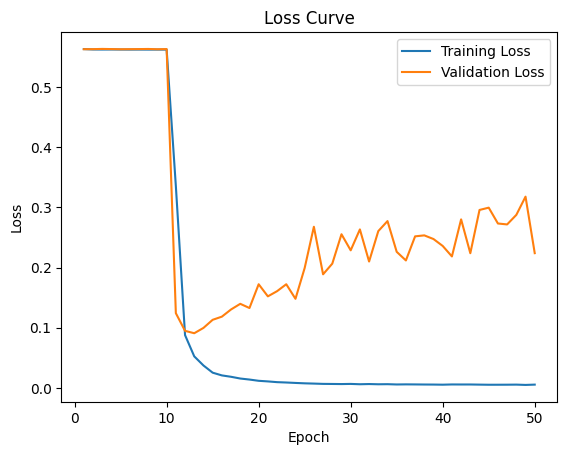

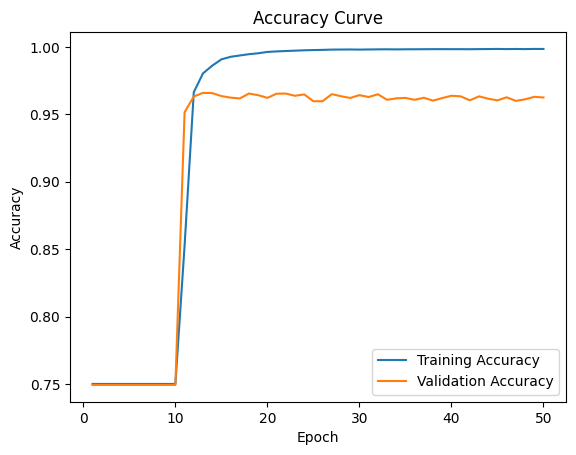

In [ ]:
import matplotlib.pyplot as plt

# 손실 및 정확도 저장
train_acc = histroy_3dence.history['accuracy']
val_acc = histroy_3dence.history['val_accuracy']
train_loss = histroy_3dence.history['loss']
val_loss = histroy_3dence.history['val_loss']

epochs = 50
length = epochs + 1

# 에폭 범위 생성
epoch_range = range(1, length)

# 손실 곡선 저장
plt.figure()
plt.plot(epoch_range, histroy_3dence.history['loss'], label='Training Loss')
plt.plot(epoch_range, histroy_3dence.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.savefig('loss_curve.png')

# 정확도 곡선 저장
plt.figure()
plt.plot(epoch_range, histroy_3dence.history['accuracy'], label='Training Accuracy')
plt.plot(epoch_range, histroy_3dence.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.savefig('accuracy_curve.png')

# 모델 평가
test_loss, test_accuracy = model_dence.evaluate(np.array(x_test), np.array(y_test), verbose=2)

# 모델 예측
predictions = model_dence.predict(np.array(x_test))
predictions = (predictions > 0.5)

# 정밀도, 재현율, F1 스코어 계산
test_precision = precision_score(y_test, predictions)
test_recall = recall_score(y_test, predictions)
test_f1 = f1_score(y_test, predictions)

print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Test Precision: {test_precision}, Test Recall: {test_recall}, Test F1 Score: {test_f1}')

# 최종 결과 출력
print(f'Final Training Loss: {train_loss[-1]}')
print(f'Final Validation Loss: {val_loss[-1]}')
print(f'Final test Loss: {test_loss}')
print(f'Final Test Accuracy: {test_accuracy}')
print(f'Final Test Precision: {test_precision}')
print(f'Final Test Recall: {test_recall}')
print(f'Final Test F1 Score: {test_f1}')

In [ ]:
# GRU 모델 정의
vocab_size = len(word_index) + 1
embedding_dim = 128
max_length = padded_sequences.shape[1]

model_dence = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GRU(128, return_sequences=True),
    GRU(128),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # 이진 분류의 경우
])

# 모델 컴파일
model_dence.compile(loss='binary_crossentropy',  # 이진 분류의 경우
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

# ModelCheckpoint 콜백을 설정하여 최상의 검증 손실이 나타날 때마다 모델을 저장합니다.
checkpoint_dence = ModelCheckpoint("best_model_dence.h5", monitor='val_loss', verbose=1, save_best_only=True)

histroy_32_dence = model_32_dence.fit(x_train, np.array(y_train), epochs=50,
                    validation_data=(x_validation, np.array(y_validation)),
                    batch_size=32, verbose=1,callbacks = [checkpoint_dence])

model_32_dence.save('model_base_dence.h5')

Epoch 1/50
5484/5484 [==============================] - ETA: 0s - loss: 0.5635 - accuracy: 0.7501
Epoch 1: val_loss improved from inf to 0.56381, saving model to best_model_dence.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5484/5484 [==============================] - 120s 21ms/step - loss: 0.5635 - accuracy: 0.7501 - val_loss: 0.5638 - val_accuracy: 0.7494
Epoch 2/50
5484/5484 [==============================] - ETA: 0s - loss: 0.5627 - accuracy: 0.7501
Epoch 2: val_loss improved from 0.56381 to 0.56302, saving model to best_model_dence.h5
5484/5484 [==============================] - 99s 18ms/step - loss: 0.5627 - accuracy: 0.7501 - val_loss: 0.5630 - val_accuracy: 0.7494
Epoch 3/50
5484/5484 [==============================] - ETA: 0s - loss: 0.5626 - accuracy: 0.7501
Epoch 3: val_loss improved from 0.56302 to 0.56296, saving model to best_model_dence.h5
5484/5484 [==============================] - 98s 18ms/step - loss: 0.5626 - accuracy: 0.7501 - val_loss: 0.5630 - val_accuracy: 0.7494
Epoch 4/50
5482/5484 [============================>.] - ETA: 0s - loss: 0.5625 - accuracy: 0.7501
Epoch 4: val_loss did not improve from 0.56296
5484/5484 [==============================] - 95s 17ms/step - loss: 0.5625 - a

1828/1828 - 12s - loss: 0.1873 - accuracy: 0.9609 - 12s/epoch - 7ms/step
1828/1828 [==============================] - 12s 6ms/step
Test Loss: 0.18733808398246765, Test Accuracy: 0.9608808755874634, Test Precision: 0.8988029763830475, Test Recall: 0.9504618542593226, Test F1 Score: 0.923910874625873
Final Training Loss: 0.00613156333565712
Final Validation Loss: 0.1983429193496704
Final test Loss: 0.18733808398246765
Final Test Accuracy: 0.9608808755874634
Final Test Precision: 0.8988029763830475
Final Test Recall: 0.9504618542593226
Final Test F1 Score: 0.923910874625873


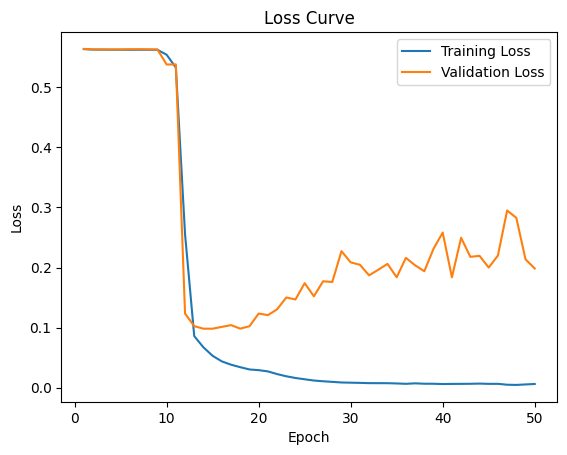

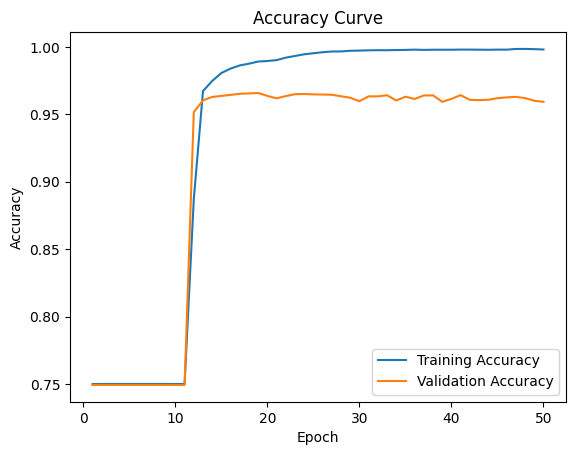

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# 손실 및 정확도 저장
train_acc = histroy_32_dence.history['accuracy']
val_acc = histroy_32_dence.history['val_accuracy']
train_loss = histroy_32_dence.history['loss']
val_loss = histroy_32_dence.history['val_loss']

epochs = 50
length = epochs + 1

# 에폭 범위 생성
epoch_range = range(1, length)

# 손실 곡선 저장
plt.figure()
plt.plot(epoch_range, histroy_32_dence.history['loss'], label='Training Loss')
plt.plot(epoch_range, histroy_32_dence.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.savefig('loss_curve.png')

# 정확도 곡선 저장
plt.figure()
plt.plot(epoch_range, histroy_32_dence.history['accuracy'], label='Training Accuracy')
plt.plot(epoch_range, histroy_32_dence.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.savefig('accuracy_curve.png')

# 모델 평가
test_loss, test_accuracy = model_32_dence.evaluate(np.array(x_test), np.array(y_test), verbose=2)

# 모델 예측
predictions = model_32_dence.predict(np.array(x_test))
predictions = (predictions > 0.5)

# 정밀도, 재현율, F1 스코어 계산
test_precision = precision_score(y_test, predictions)
test_recall = recall_score(y_test, predictions)
test_f1 = f1_score(y_test, predictions)

print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Test Precision: {test_precision}, Test Recall: {test_recall}, Test F1 Score: {test_f1}')

# 최종 결과 출력
print(f'Final Training Loss: {train_loss[-1]}')
print(f'Final Validation Loss: {val_loss[-1]}')
print(f'Final test Loss: {test_loss}')
print(f'Final Test Accuracy: {test_accuracy}')
print(f'Final Test Precision: {test_precision}')
print(f'Final Test Recall: {test_recall}')
print(f'Final Test F1 Score: {test_f1}')